# APPLE STOCK FORECAST

# Dataset Details

In [4]:
import pandas as pd
apple_data = pd.read_csv('AAPL.csv')
apple_data.shape

(2011, 7)

In [6]:
apple_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [8]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [10]:
apple_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


# Checking Null Values

In [14]:
apple_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Converting 'Date' column to DateTime

In [16]:
apple_data['Date'] = pd.to_datetime(apple_data['Date'])
apple_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [18]:
apple_data['Year'] = apple_data['Date'].dt.year
apple_data['Month'] = apple_data['Date'].dt.month
apple_data['Day'] = apple_data['Date'].dt.day
apple_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,2012,1,3
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,2012,1,4
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,2012,1,5
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,2012,1,6
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,2012,1,9


# EDA - Data Visualization

# 1. Boxplot for numerical columns

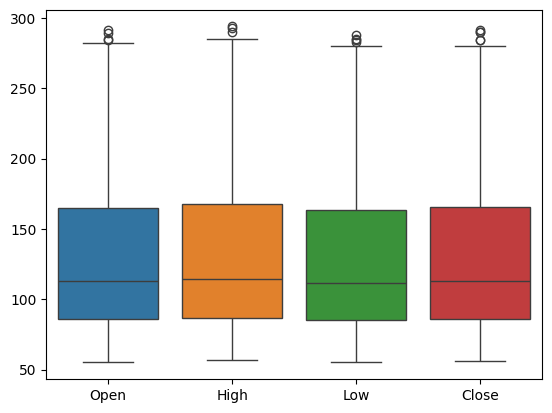

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data = apple_data[['Open', 'High', 'Low', 'Close']])
plt.show()

# 2. Stock Price Overview - Analyzing Trends Over Time

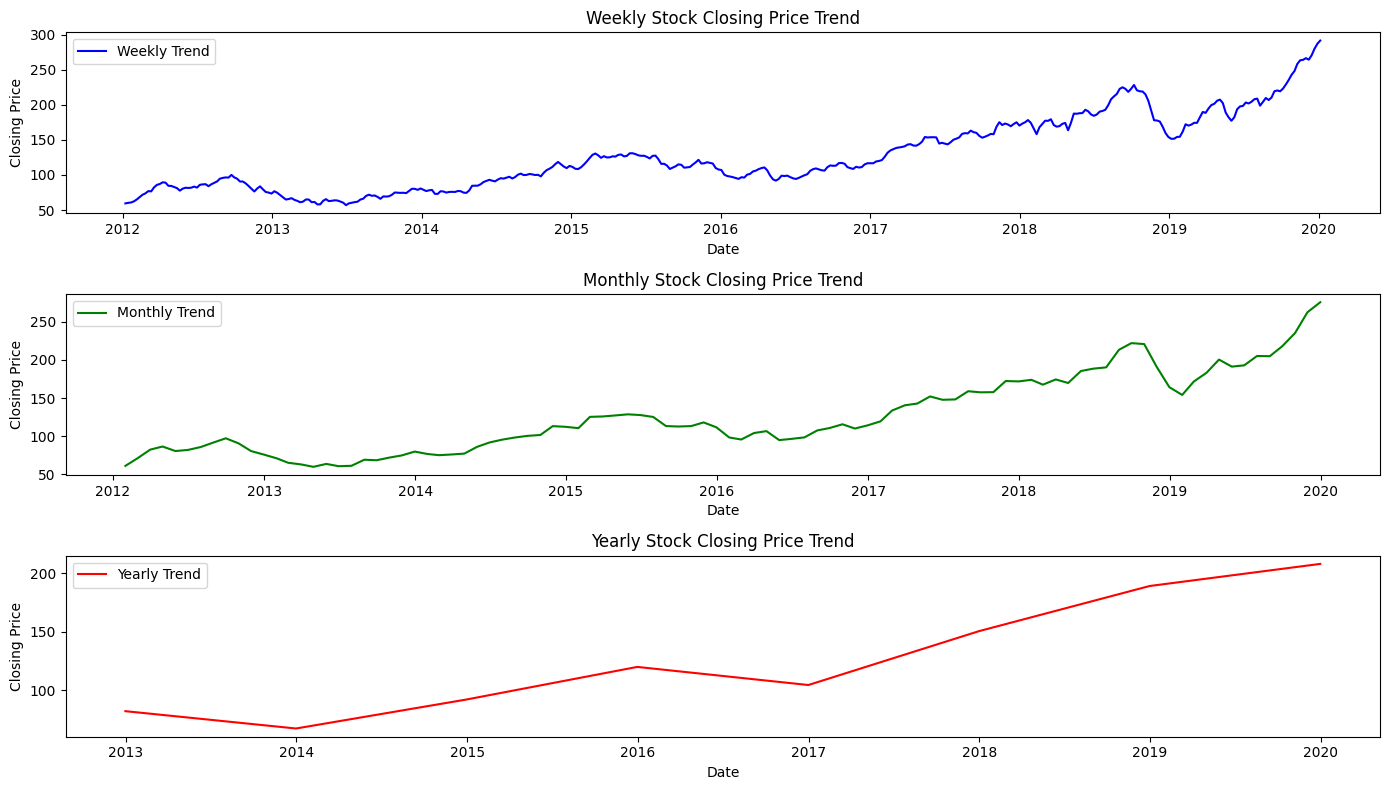

In [25]:
apple_data['Date'] = pd.to_datetime(apple_data['Date'])

apple_data.set_index('Date', inplace = True)

# Resamplimg to monthly, weekly, and yearly frequency
monthly_data = apple_data.resample('M').mean()  
weekly_data = apple_data.resample('W').mean()   
yearly_data = apple_data.resample('A').mean()  

monthly_data = monthly_data.dropna()
weekly_data = weekly_data.dropna()
yearly_data = yearly_data.dropna()

plt.figure(figsize = (14, 8))

# Weekly trend
plt.subplot(3, 1, 1)
plt.plot(weekly_data.index, weekly_data['Close'], label = 'Weekly Trend', color = 'blue')
plt.title('Weekly Stock Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

# Monthly trend
plt.subplot(3, 1, 2)
plt.plot(monthly_data.index, monthly_data['Close'], label = 'Monthly Trend', color = 'green')
plt.title('Monthly Stock Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

# Yearly trend
plt.subplot(3, 1, 3)
plt.plot(yearly_data.index, yearly_data['Close'], label = 'Yearly Trend', color = 'red')
plt.title('Yearly Stock Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

plt.tight_layout()
plt.show()

# 3. Stock Volatility and Trading Activity

# a) Volume Trend Over Time

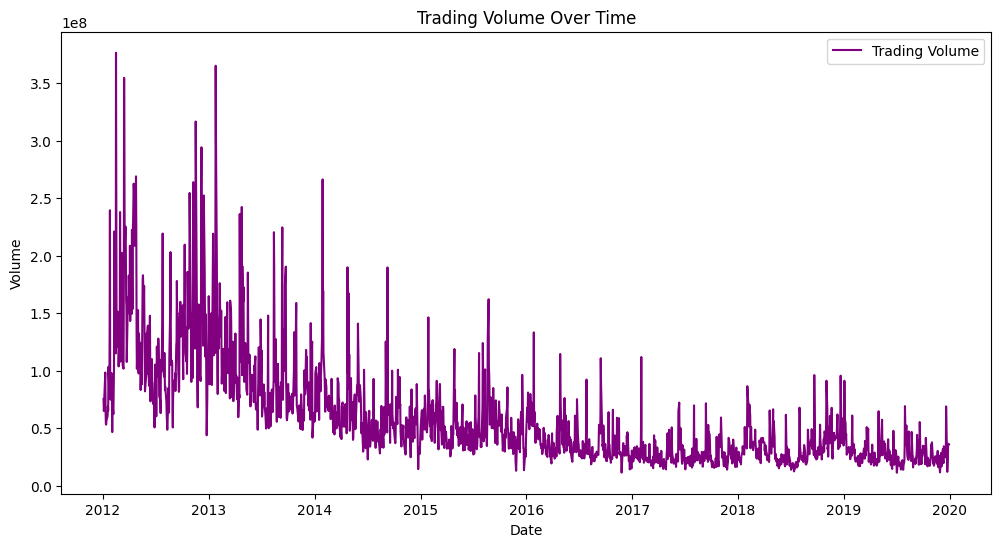

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(apple_data.index, apple_data['Volume'], label = 'Trading Volume', color = 'purple')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# b) Daily Price Range

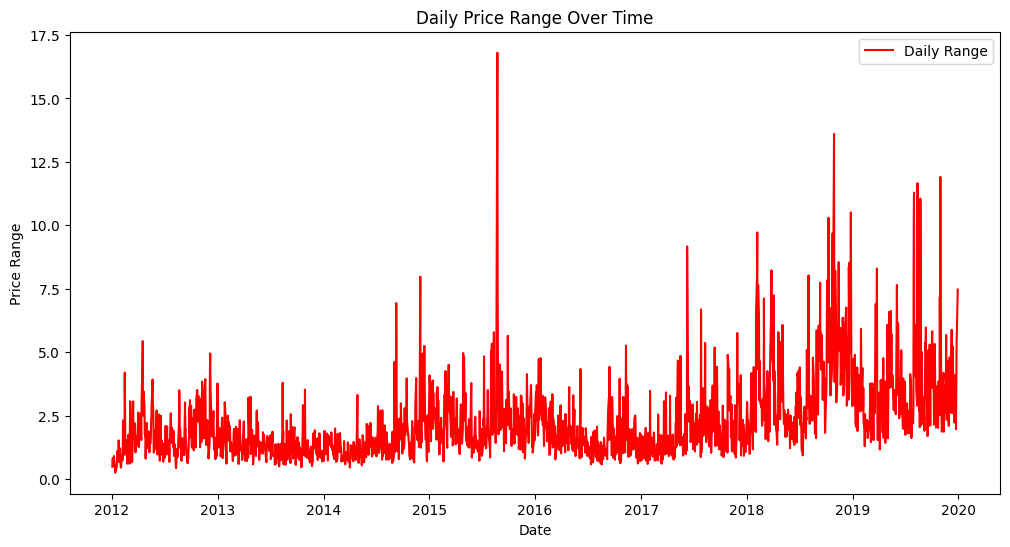

In [32]:
plt.figure(figsize = (12, 6))
plt.plot(apple_data.index, apple_data['High'] - apple_data['Low'], label = 'Daily Range', color = 'red')
plt.title('Daily Price Range Over Time')
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.legend()
plt.show()

# c) Daily Percentage Change

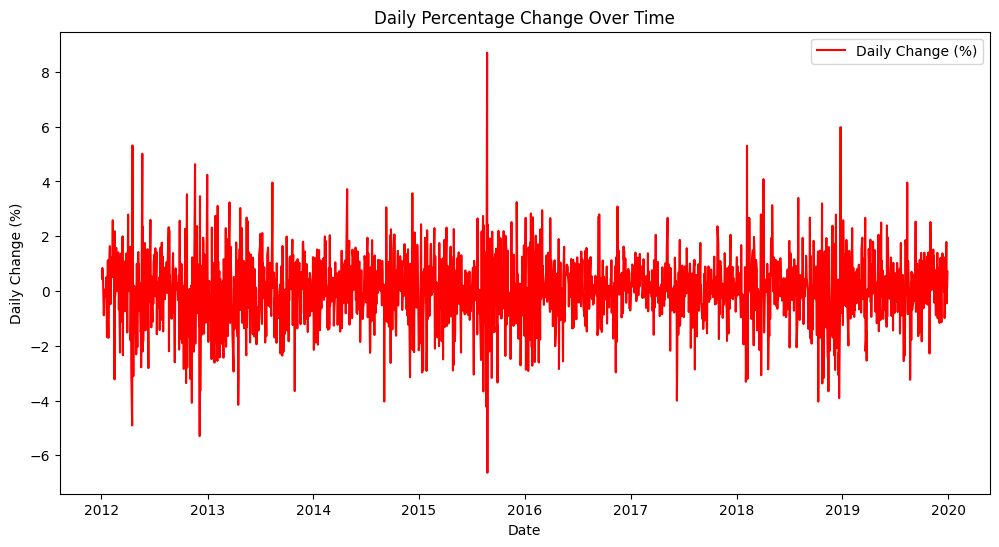

In [38]:
apple_data['Daily Change (%)'] = ((apple_data['Close'] - apple_data['Open']) / apple_data['Open']) * 100

plt.figure(figsize = (12, 6))
plt.plot(apple_data.index, apple_data['Daily Change (%)'], label = 'Daily Change (%)', color = 'red')
plt.title('Daily Percentage Change Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Change (%)')
plt.legend()
plt.show()

# d) Rolling Volatility

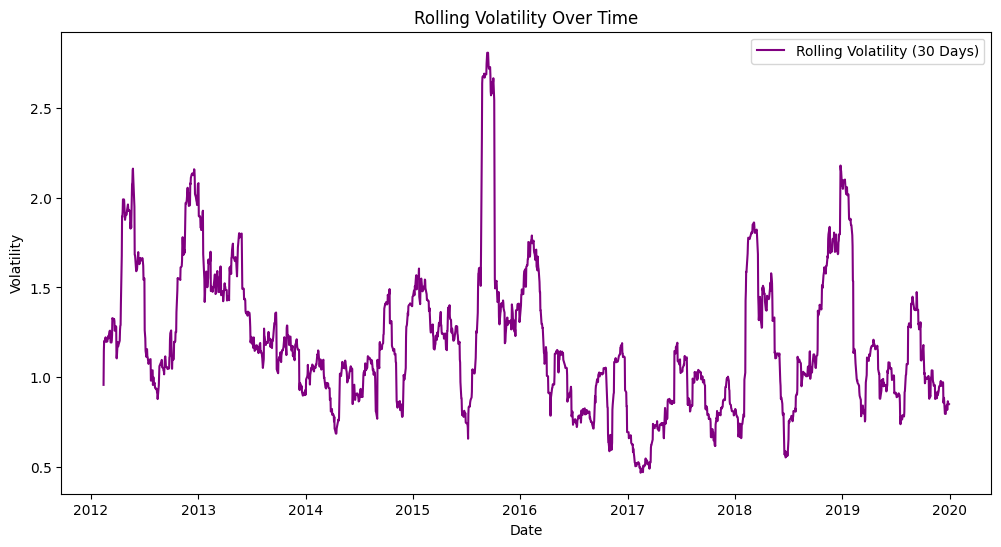

In [41]:
apple_data['Rolling Volatility'] = apple_data['Daily Change (%)'].rolling(window = 30).std()

plt.figure(figsize = (12, 6))
plt.plot(apple_data.index, apple_data['Rolling Volatility'], label = 'Rolling Volatility (30 Days)', color = 'purple')
plt.title('Rolling Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# 4. Distribution of Stock Price Data

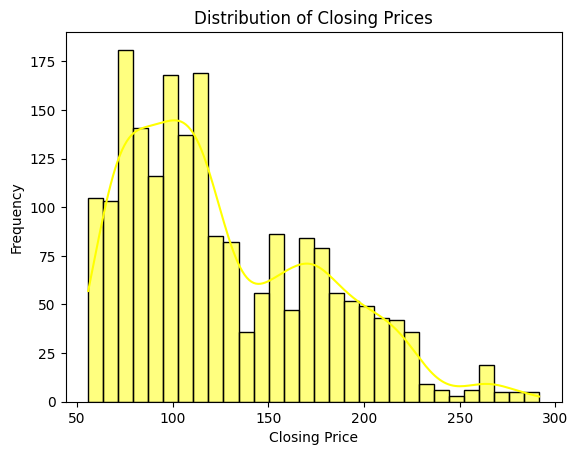

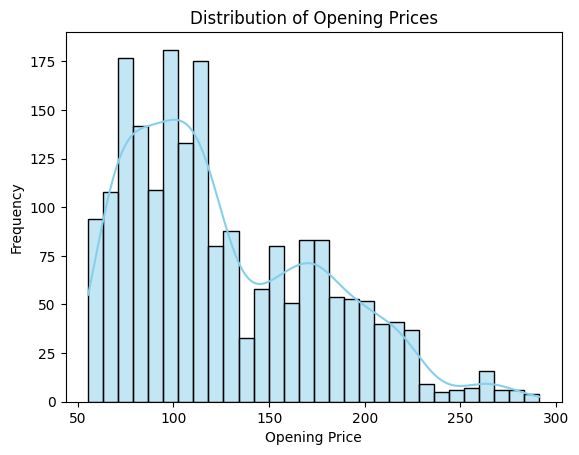

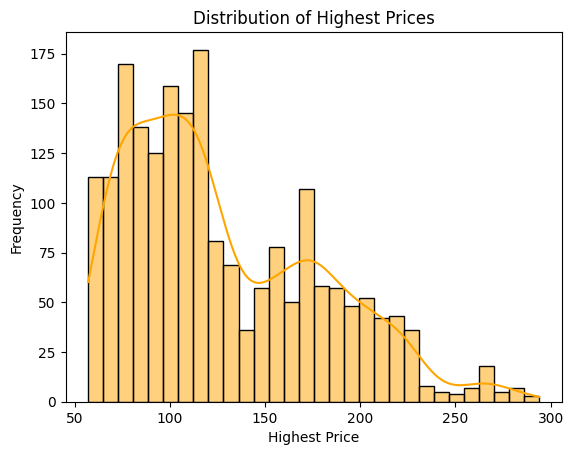

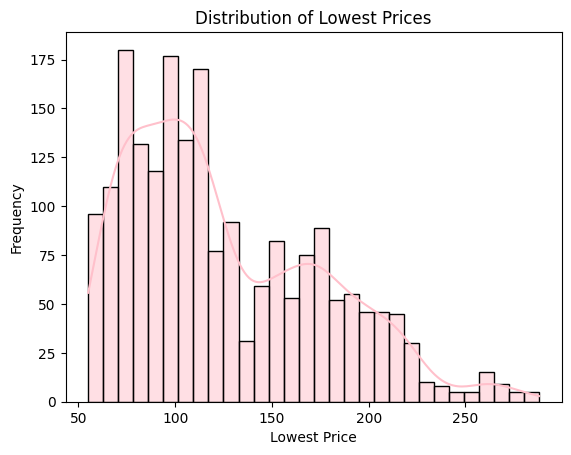

In [44]:
sns.histplot(apple_data['Close'], kde = True, bins = 30, color = 'yellow')
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

sns.histplot(apple_data['Open'], kde = True, bins = 30, color = 'skyblue')
plt.title('Distribution of Opening Prices')
plt.xlabel('Opening Price')
plt.ylabel('Frequency')
plt.show()

sns.histplot(apple_data['High'], kde = True, bins = 30, color = 'orange')
plt.title('Distribution of Highest Prices')
plt.xlabel('Highest Price')
plt.ylabel('Frequency')
plt.show()

sns.histplot(apple_data['Low'], kde = True, bins = 30, color = 'pink')
plt.title('Distribution of Lowest Prices')
plt.xlabel('Lowest Price')
plt.ylabel('Frequency')
plt.show()

# 5. Correlation and Relationships between Features

# a) Heatmap

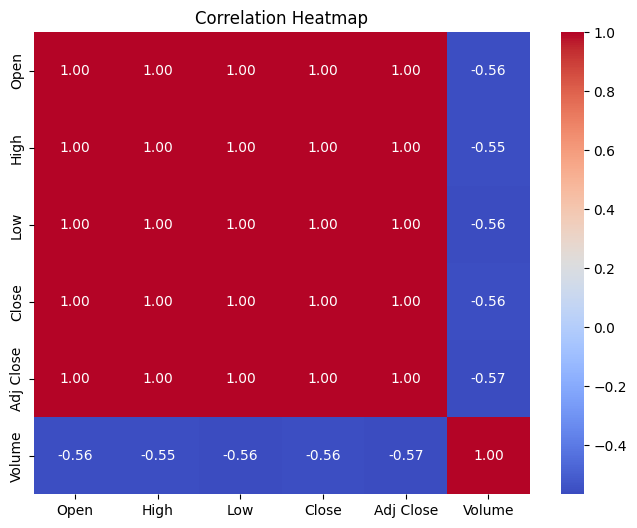

In [48]:
corr_matrix = apple_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()

# b) Pairplot

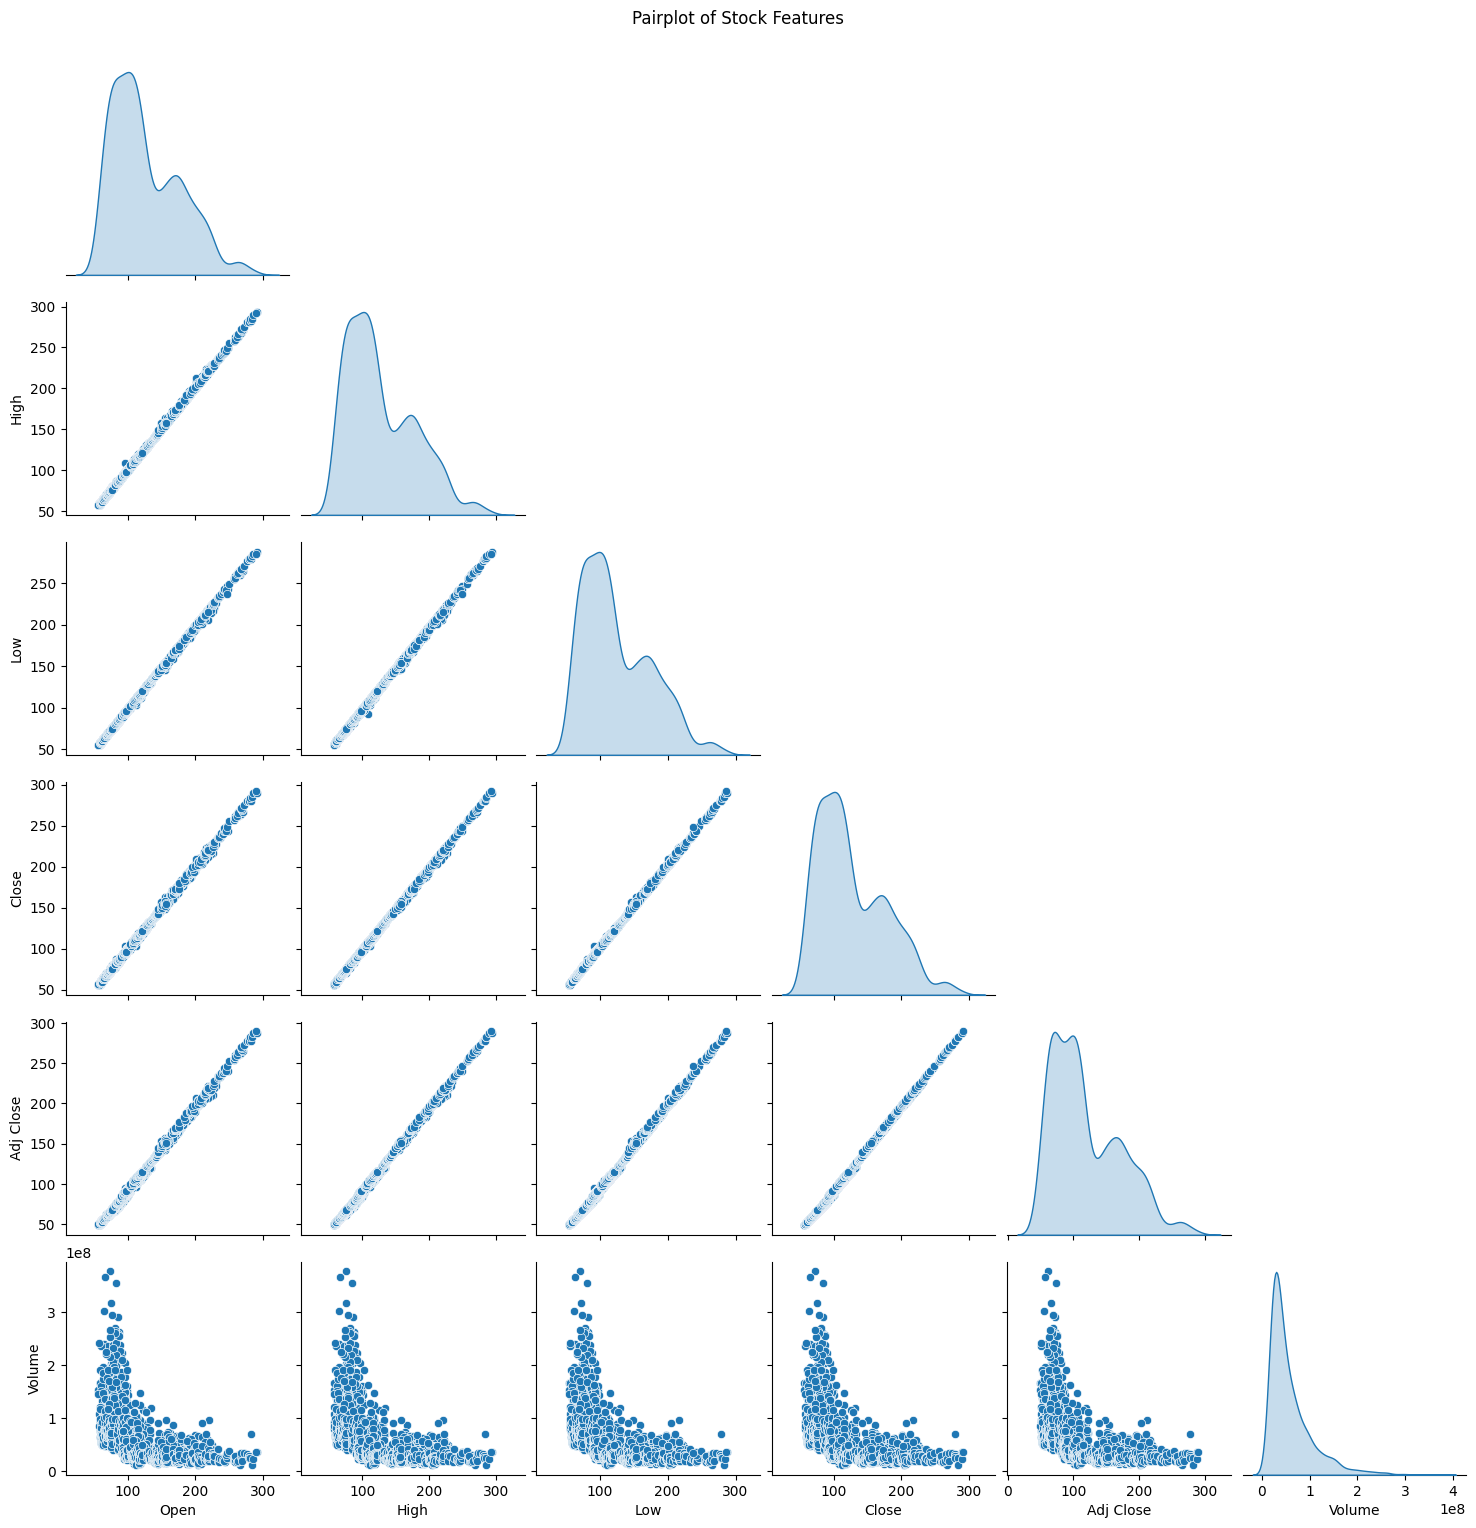

In [51]:
# Pairwise relationships between numerical variables

sns.pairplot(apple_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']], diag_kind = 'kde', corner = True)
plt.suptitle('Pairplot of Stock Features', y = 1.02)
plt.show()

# 6. Moving Averages

# a) 7-Day Moving Average with Closing Price

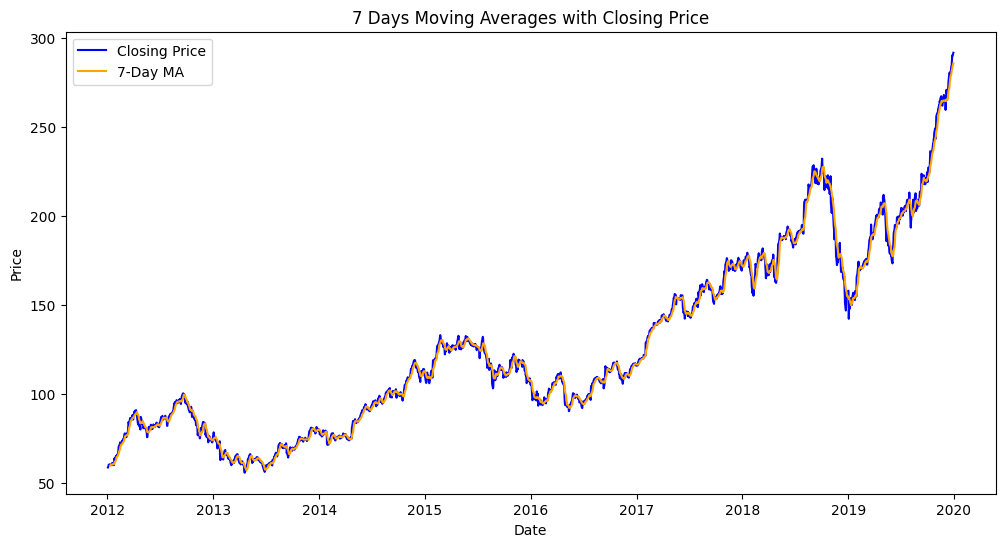

In [59]:
apple_data['7-Day MA'] = apple_data['Close'].rolling(window = 7).mean()

plt.figure(figsize = (12, 6))
plt.plot(apple_data.index, apple_data['Close'], label = 'Closing Price', color = 'blue')
plt.plot(apple_data.index, apple_data['7-Day MA'], label = '7-Day MA', color = 'orange')
plt.title('7 Days Moving Averages with Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# b) 30-Day Moving Average with Closing Price

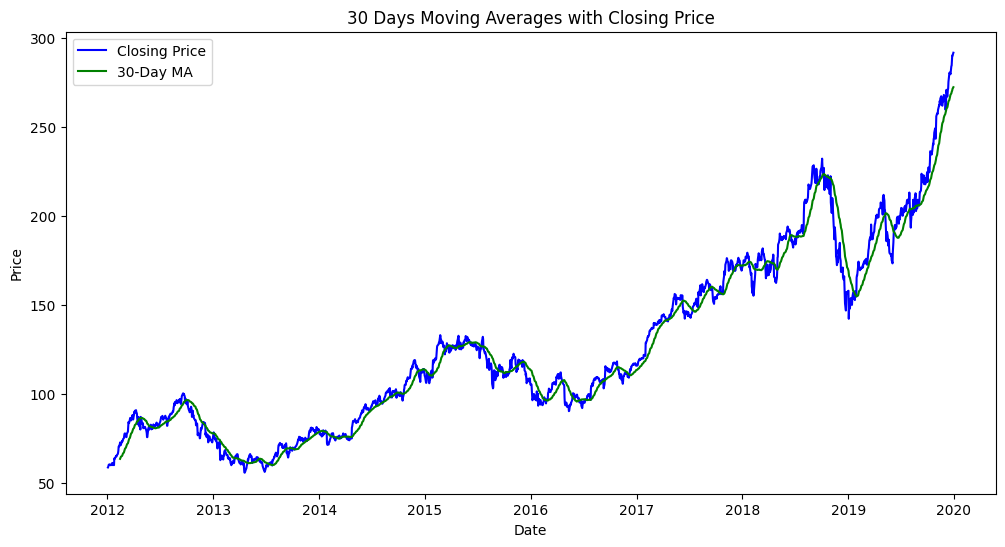

In [62]:
apple_data['30-Day MA'] = apple_data['Close'].rolling(window = 30).mean()

plt.figure(figsize = (12, 6))
plt.plot(apple_data.index, apple_data['Close'], label = 'Closing Price', color = 'blue')
plt.plot(apple_data.index, apple_data['30-Day MA'], label = '30-Day MA', color = 'green')
plt.title('30 Days Moving Averages with Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 7. Trading Volume and Stock Price Interaction

# a) Price and Volume Relationship

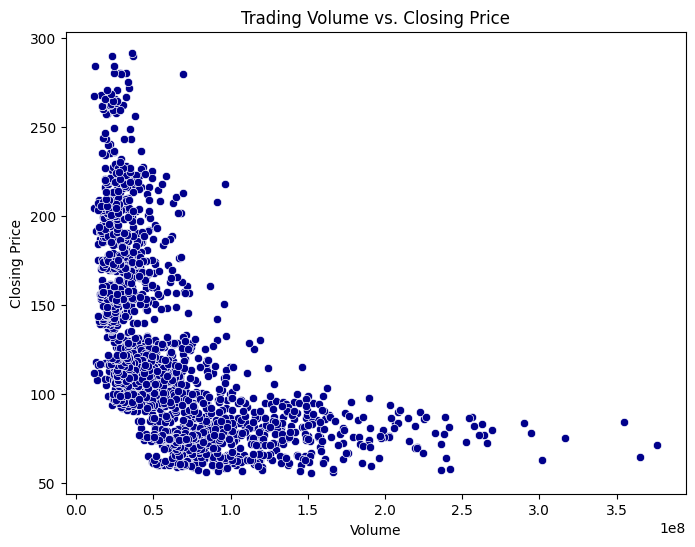

In [72]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = apple_data['Volume'], y = apple_data['Close'], color = 'darkblue')
plt.title('Trading Volume vs. Closing Price')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.show()

# b) Highest Volume Trading Days

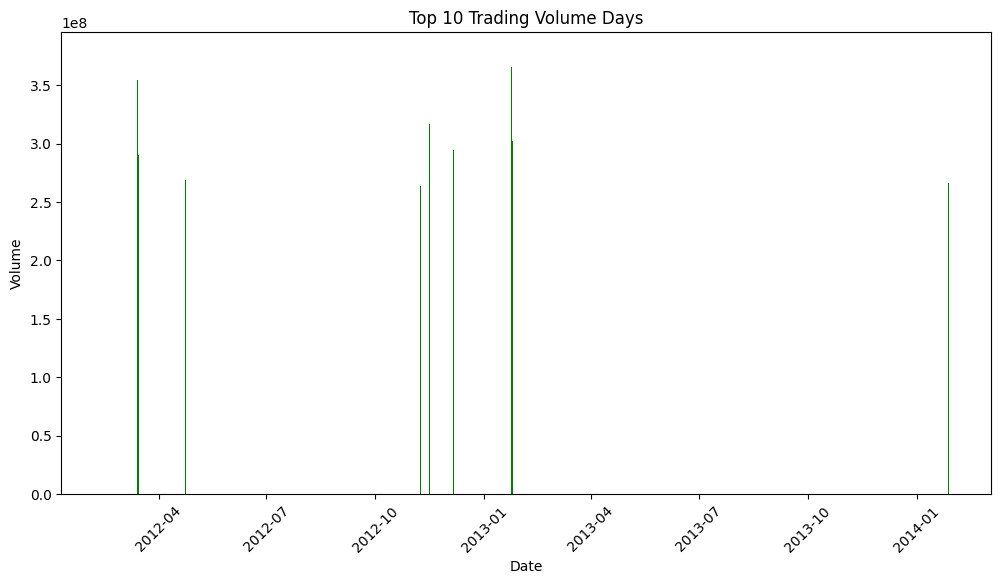

In [75]:
top_10_volumes = apple_data.nlargest(10, 'Volume')

plt.figure(figsize = (12, 6))
plt.bar(top_10_volumes.index, top_10_volumes['Volume'], color = 'green')
plt.title("Top 10 Trading Volume Days")
plt.ylabel("Volume")
plt.xlabel("Date")
plt.xticks(rotation = 45)
plt.show()

# 8. Yearly Insights - Resampling Analysis

# a) Yearly Minimum, Maximum, and Average Prices

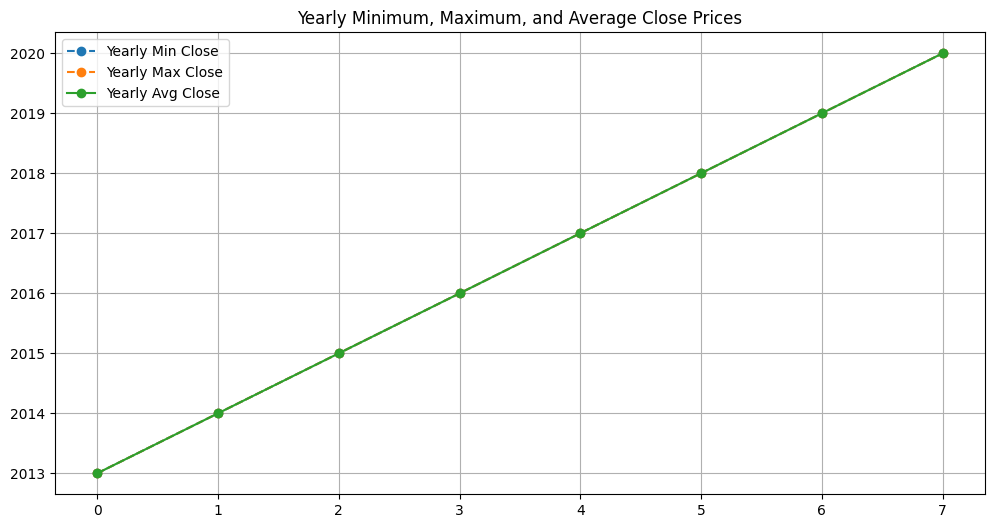

In [80]:
apple_data.index = pd.to_datetime(apple_data.index)

yearly_min = apple_data['Close'].resample('A').min()
yearly_max = apple_data['Close'].resample('A').max()
yearly_mean = apple_data['Close'].resample('A').mean()

plt.figure(figsize = (12, 6))
plt.plot(yearly_min.index, label = 'Yearly Min Close', linestyle = '--', marker = 'o')
plt.plot(yearly_max.index, label = 'Yearly Max Close', linestyle = '--', marker = 'o')
plt.plot(yearly_mean.index, label = 'Yearly Avg Close', linestyle = '-', marker = 'o')
plt.title('Yearly Minimum, Maximum, and Average Close Prices')
plt.legend()
plt.grid()
plt.show()

# b) Year with Maximum Trading Volume

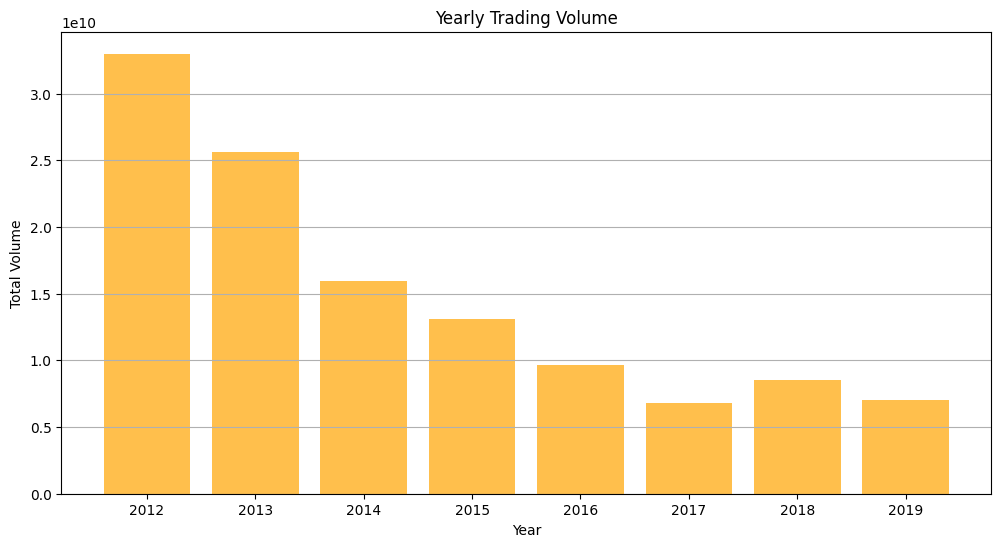

In [83]:
yearly_volume = apple_data['Volume'].resample('A').sum()
plt.figure(figsize = (12, 6))
plt.bar(yearly_volume.index.year, yearly_volume, color = 'orange', alpha = 0.7)
plt.title('Yearly Trading Volume')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.grid(axis = 'y')
plt.show()

# c) Yearly High and Low Prices

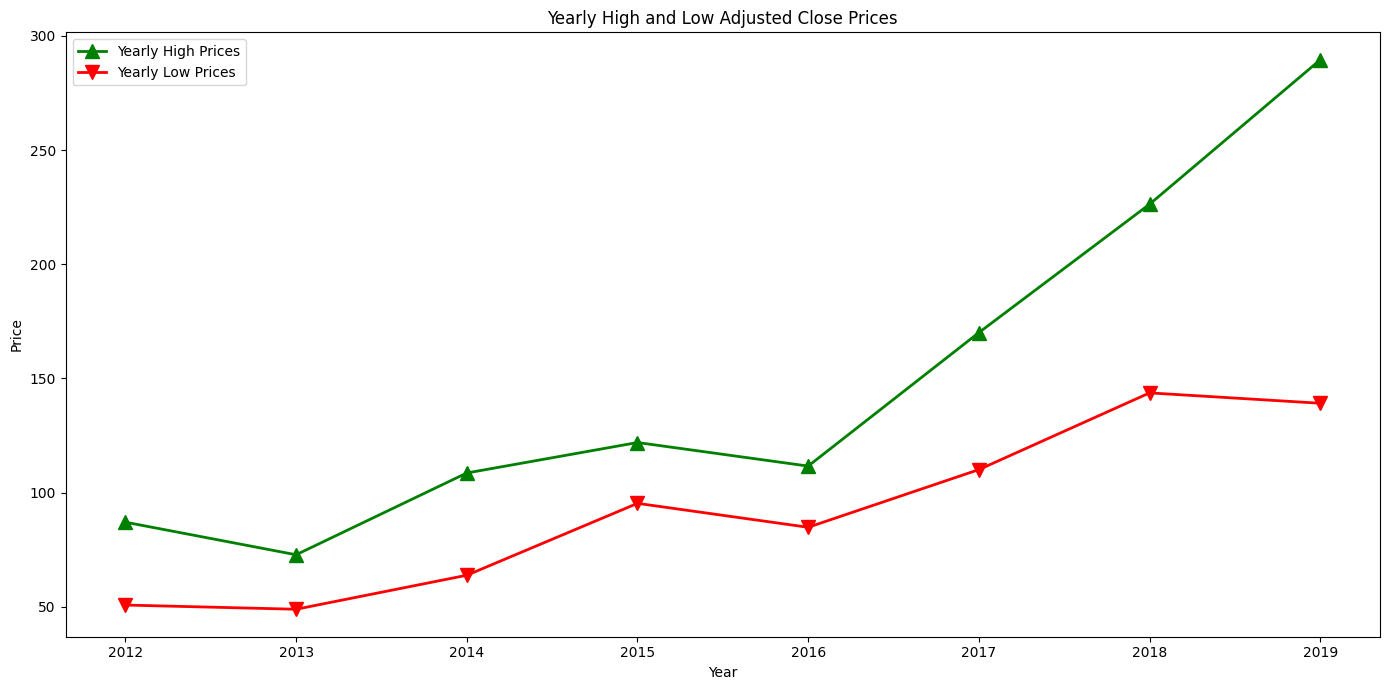

In [129]:
yearly_high = apple_data.groupby('Year')['Adj Close'].max()
yearly_low = apple_data.groupby('Year')['Adj Close'].min()

# Plotting the Yearly High and Low Prices
plt.figure(figsize=(14, 7))

# Plot Yearly High Prices
plt.plot(yearly_high.index, yearly_high.values, label='Yearly High Prices', color='green', marker='^', linestyle='-', linewidth=2, markersize=10)

# Plot Yearly Low Prices
plt.plot(yearly_low.index, yearly_low.values, label='Yearly Low Prices', color='red', marker='v', linestyle='-', linewidth=2, markersize=10)

# Title and labels
plt.title('Yearly High and Low Adjusted Close Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

# 9. Monthly Insights

# a) Monthly Average Price Trends

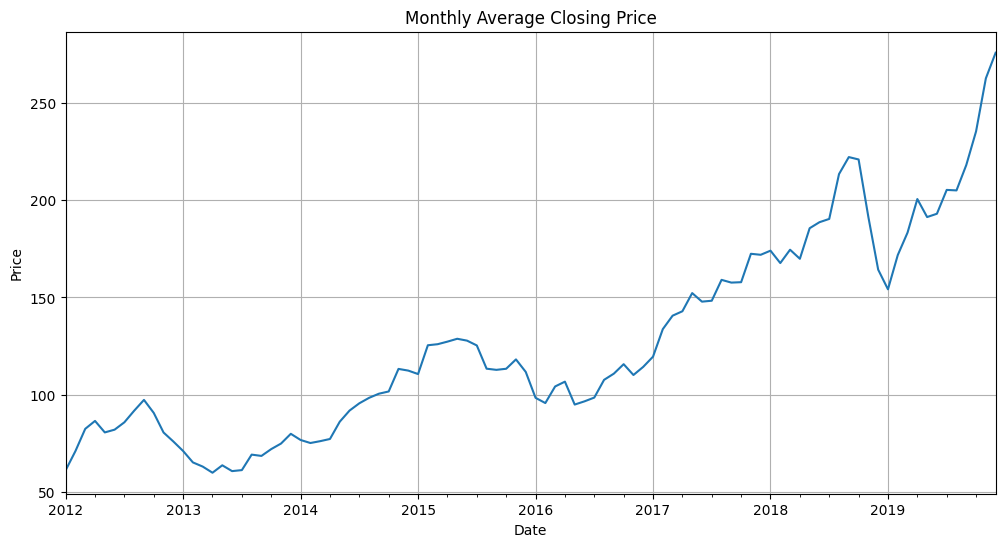

In [88]:
monthly_avg = apple_data['Close'].resample('M').mean()

plt.figure(figsize = (12, 6))
monthly_avg.plot(title = 'Monthly Average Closing Price')
plt.ylabel('Price')
plt.grid()
plt.show()

# b) Monthly Volume Trends for Year with Maximum Volume

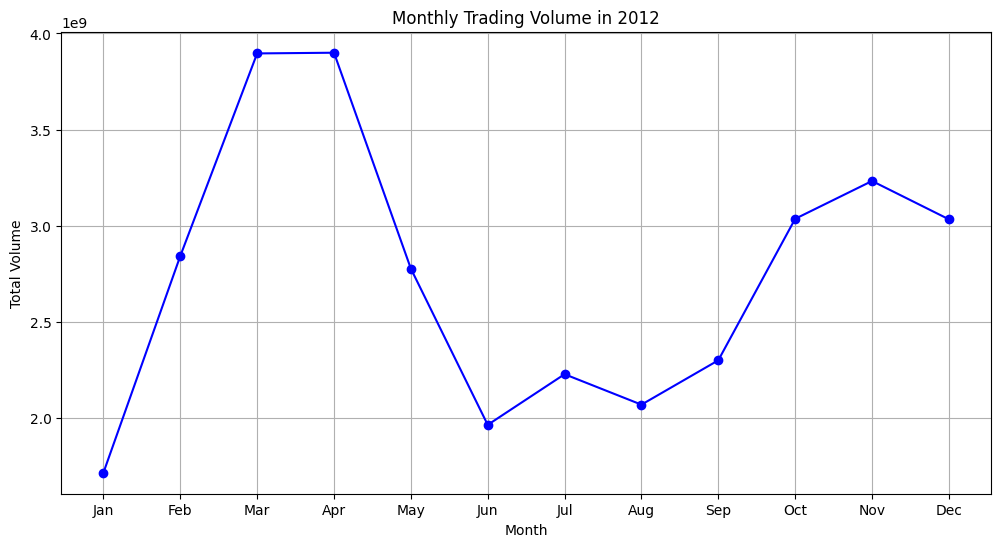

In [91]:
max_volume_year = yearly_volume.idxmax().year
monthly_volume = apple_data['Volume'][str(max_volume_year)].resample('M').sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_volume.index.month, monthly_volume, marker = 'o', color = 'blue')
plt.title(f'Monthly Trading Volume in {max_volume_year}')
plt.xlabel('Month')
plt.ylabel('Total Volume')
plt.grid()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# c) Monthly Price Trends for Year with Maximum Volume

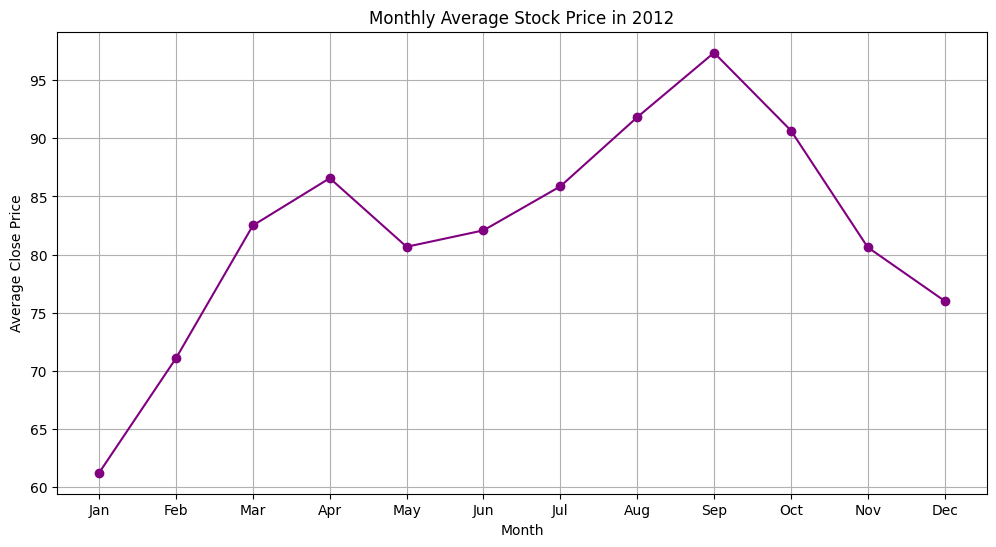

In [94]:
monthly_price = apple_data['Close'][str(max_volume_year)].resample('M').mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_price.index.month, monthly_price, marker = 'o', color = 'purple')
plt.title(f'Monthly Average Stock Price in {max_volume_year}')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.grid()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# d) Monthly Stock Price Volatility

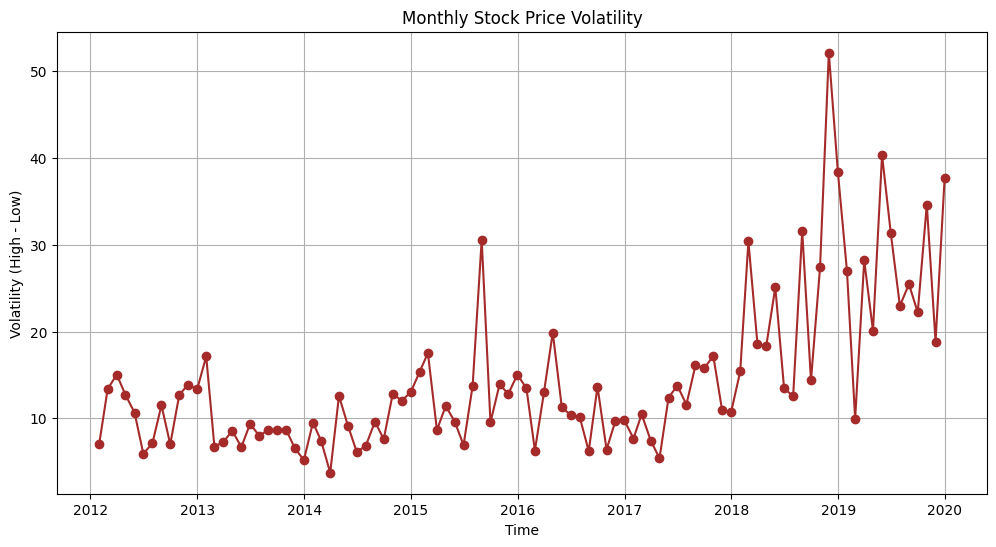

In [97]:
monthly_high = apple_data['High'].resample('M').max()
monthly_low = apple_data['Low'].resample('M').min()
volatility = monthly_high - monthly_low

plt.figure(figsize = (12, 6))
plt.plot(volatility.index, volatility, marker = 'o', color = 'brown')
plt.title('Monthly Stock Price Volatility')
plt.xlabel('Time')
plt.ylabel('Volatility (High - Low)')
plt.grid()
plt.show()

# e) Monthly Average Price vs Trading Volume

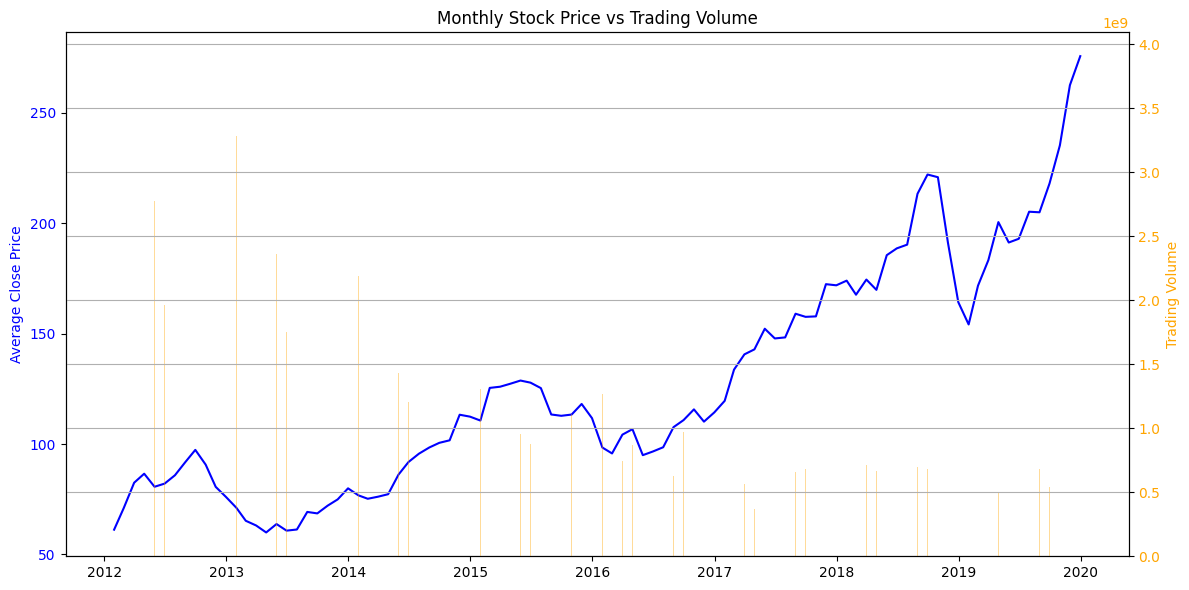

In [100]:
monthly_avg_price = apple_data['Close'].resample('M').mean()
monthly_total_volume = apple_data['Volume'].resample('M').sum()

fig, ax1 = plt.subplots(figsize = (12, 6))

ax1.plot(monthly_avg_price.index, monthly_avg_price, color = 'blue', label = 'Average Price')
ax1.set_ylabel('Average Close Price', color ='blue')
ax1.tick_params(axis = 'y', labelcolor = 'blue')

ax2 = ax1.twinx()
ax2.bar(monthly_total_volume.index, monthly_total_volume, color = 'orange', alpha = 0.4, label = 'Total Volume')
ax2.set_ylabel('Trading Volume', color = 'orange')
ax2.tick_params(axis = 'y', labelcolor = 'orange')

plt.title('Monthly Stock Price vs Trading Volume')
fig.tight_layout()
plt.grid()
plt.show()

# 10. Extreme Values

# a) All-Time Highs and Lows

All-Time High Close Price: 291.519989
All-Time Low Close Price: 55.790001


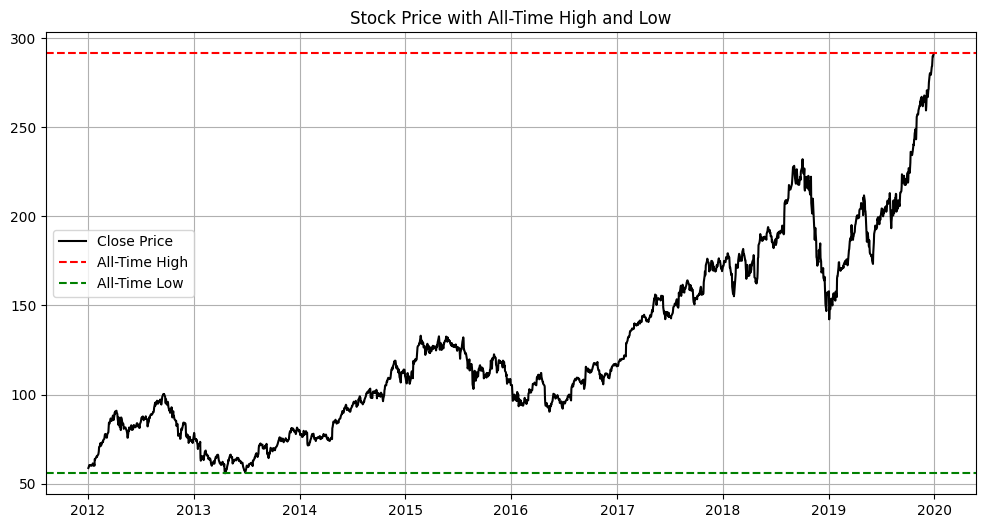

In [104]:
all_time_high = apple_data['Close'].max()
all_time_low = apple_data['Close'].min()

print(f'All-Time High Close Price: {all_time_high}')
print(f'All-Time Low Close Price: {all_time_low}')

plt.figure(figsize = (12, 6))
plt.plot(apple_data['Close'], label = 'Close Price', color = 'black')
plt.axhline(all_time_high, color = 'red', linestyle = '--', label = 'All-Time High')
plt.axhline(all_time_low, color = 'green', linestyle = '--', label = 'All-Time Low')
plt.title('Stock Price with All-Time High and Low')
plt.legend()
plt.grid()
plt.show()

# b) Stock Behavior on High/Low Volume Days

In [107]:
high_volume_days = apple_data.nlargest(10, 'Volume')  
low_volume_days = apple_data.nsmallest(10, 'Volume') 

print("High Volume Days:\n", high_volume_days[['Adj Close', 'Open', 'High', 'Low', 'Close', 'Volume']])
print("\nLow Volume Days:\n", low_volume_days[['Adj Close', 'Open', 'High', 'Low', 'Close', 'Volume']])

High Volume Days:
             Adj Close       Open       High        Low      Close     Volume
Date                                                                        
2012-02-15  61.436600  73.465714  75.184288  70.984283  71.095711  376530000
2013-01-24  56.107410  65.714287  66.532860  64.321426  64.357140  365213100
2012-03-14  72.782761  82.578575  84.959999  82.199997  84.225716  354711000
2012-11-16  65.719765  75.028572  75.714287  72.250000  75.382858  316723400
2013-01-25  54.784744  64.527145  65.175713  62.142857  62.840000  302006600
2012-12-06  68.155861  75.562859  79.044289  74.089996  78.177139  294303100
2012-03-15  72.286484  85.658569  85.715714  82.650002  83.651428  289929500
2012-04-24  69.165718  80.372856  81.098572  79.285713  80.040001  269037300
2014-01-28  64.666603  72.680000  73.571426  71.724289  72.357140  266380800
2012-11-08  66.973930  80.089996  80.318573  76.470001  76.821426  264036500

Low Volume Days:
              Adj Close        Open    

# c) Top 10 High Volume Days and Low Volume Days

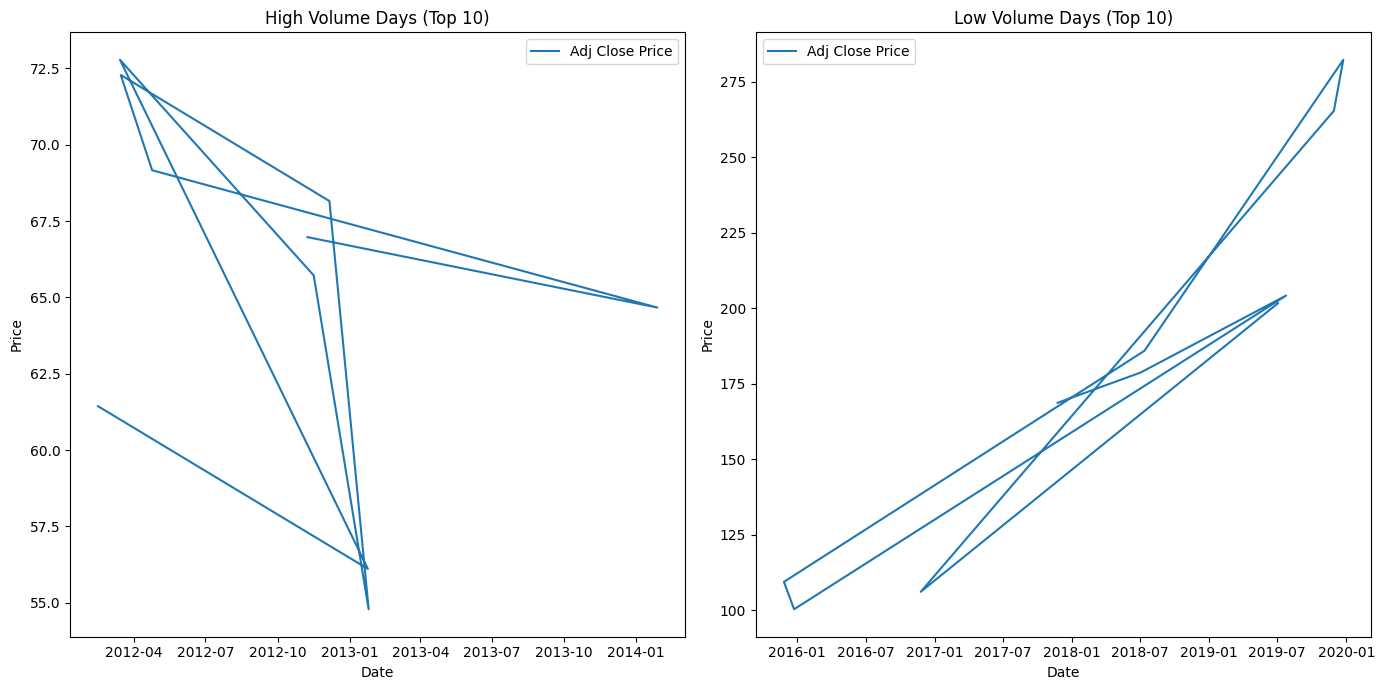

In [110]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(high_volume_days['Adj Close'], label = 'Adj Close Price')
plt.title('High Volume Days (Top 10)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(low_volume_days['Adj Close'], label = 'Adj Close Price')
plt.title('Low Volume Days (Top 10)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

# 11. Seasonal and Decomposition Analysis

# a) Seasonal Trend (Average Monthly Stock Price)

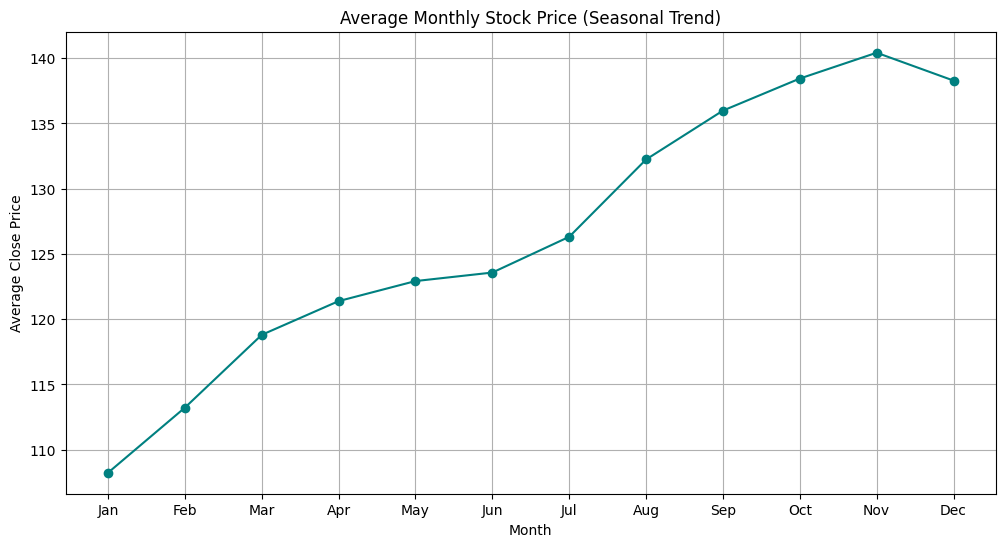

In [114]:
monthly_mean_prices = apple_data['Close'].resample('M').mean()
monthly_avg_by_month = monthly_mean_prices.groupby(monthly_mean_prices.index.month).mean()

plt.figure(figsize = (12, 6))
plt.plot(range(1, 13), monthly_avg_by_month, marker = 'o', color = 'teal')
plt.title('Average Monthly Stock Price (Seasonal Trend)')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

# b) Decomposition of Stock Prices (Seasonality, Trend, Residuals)

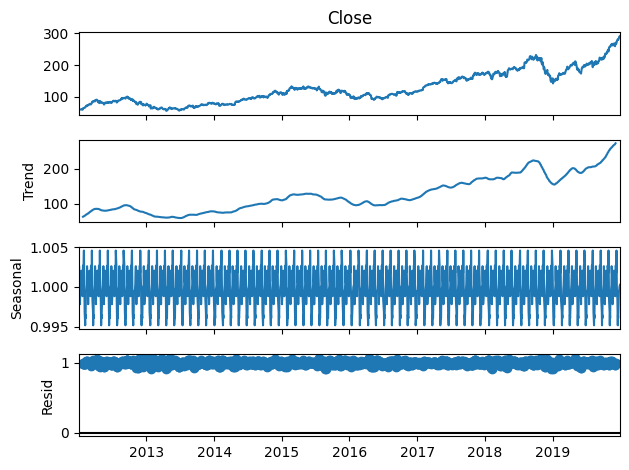

In [117]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result = seasonal_decompose(apple_data['Close'], model = 'multiplicative', period = 30)

decompose_result.plot()
plt.show()

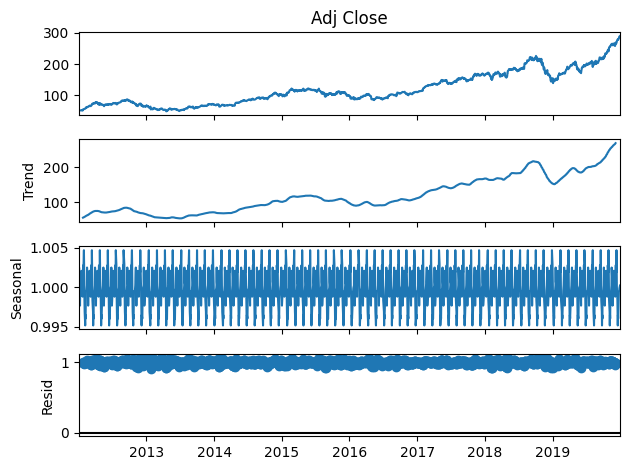

In [119]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result = seasonal_decompose(apple_data['Adj Close'], model = 'multiplicative', period = 30)

decompose_result.plot()
plt.show()